In [1]:
import seaborn as sns
import numpy as np
import sys
sys.path.append("../code/")
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker
import math

In [2]:
tensor = np.load("../2015-5appliances-true-agg.npy")

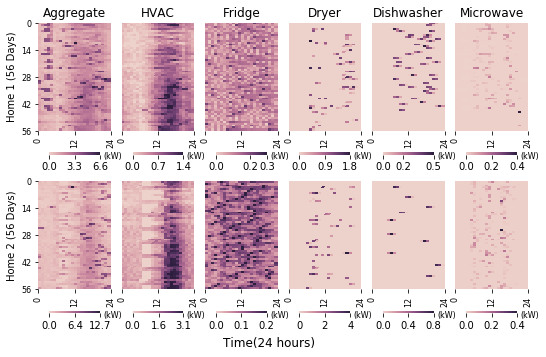

In [3]:
fig, axes = plt.subplots(ncols=6, nrows = 2, figsize=(8, 5))
ax = axes.flatten()
home = 51
cmap = sns.cubehelix_palette(as_cmap=True)
# sns.set(font_scale=0.8)
for i, home in enumerate([12, 10]):
    
    for j in range(6):
        vmax = round(tensor[home, j, :56].max()/1000, 1)
        mid = round(vmax/2, 1)
        sns.heatmap(tensor[home, j, :56]/1000, cmap=cmap, ax=ax[i*6+j], 
                    vmin=0, vmax=vmax, cbar_kws={"ticks":[0, mid, vmax],
                                                "orientation":"horizontal",
                                                "shrink": 0.7, "fraction":0.1})
        ax[i*6+j].tick_params(labelsize=8)
        ax[i*6+j].collections[0].colorbar.set_label("(kW)", x=1.25, labelpad=-20, fontsize=8)

        #     sns.heatmap(tensor[home, 1, :56]/1000, cmap=cmap, ax=ax[i*6+1])
#     sns.heatmap(tensor[home, 2, :56]/1000, cmap=cmap, ax=ax[i*6+2])
#     sns.heatmap(tensor[home, 3, :56]/1000, cmap=cmap, ax=ax[i*6+3])
#     sns.heatmap(tensor[home, 4, :56]/1000, cmap=cmap, ax=ax[i*6+4])
#     sns.heatmap(tensor[home, 5, :56]/1000, cmap=cmap, ax=ax[i*6+5], cbar_kws={'label': '(kW)'})
for i in range(12):
    ax[i].xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
    ax[i].xaxis.set_major_locator(ticker.MultipleLocator(base=12))
    ax[i].yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
    ax[i].yaxis.set_major_locator(ticker.MultipleLocator(base=14))
    if i != 0 and i != 6:
        ax[i].get_yaxis().set_visible(False)
    
#     frame1.axes.get_yaxis().set_visible(False)
ax[0].set_ylabel('Home 1 (56 Days)')
ax[6].set_ylabel('Home 2 (56 Days)')
# ax[0].collections[0].colorbar.set_label("(kW)", x=1.25, labelpad=-20, fontsize=8)
i=1
# ax[i*6+0].set_xlabel('hour')
# ax[i*6+1].set_xlabel('hour')
# ax[i*6+2].set_xlabel('hour')
# ax[i*6+3].set_xlabel('hour')
# ax[i*6+4].set_xlabel('hour')
# ax[i*6+5].set_xlabel('hour')
i=0
ax[i*6].set_title('Aggregate')
ax[i*6+1].set_title('HVAC')
ax[i*6+2].set_title('Fridge')
ax[i*6+3].set_title('Dryer')
ax[i*6+4].set_title('Dishwasher')
ax[i*6+5].set_title('Microwave')
fig.text(0.5,0.02, 'Time(24 hours)', ha='center', fontsize=12)

fig.tight_layout()
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.1, wspace=0.15)
plt.savefig("./figure/heatmap_home_all_2.pdf", format='pdf',bbox_inches='tight', pad_inches=0)

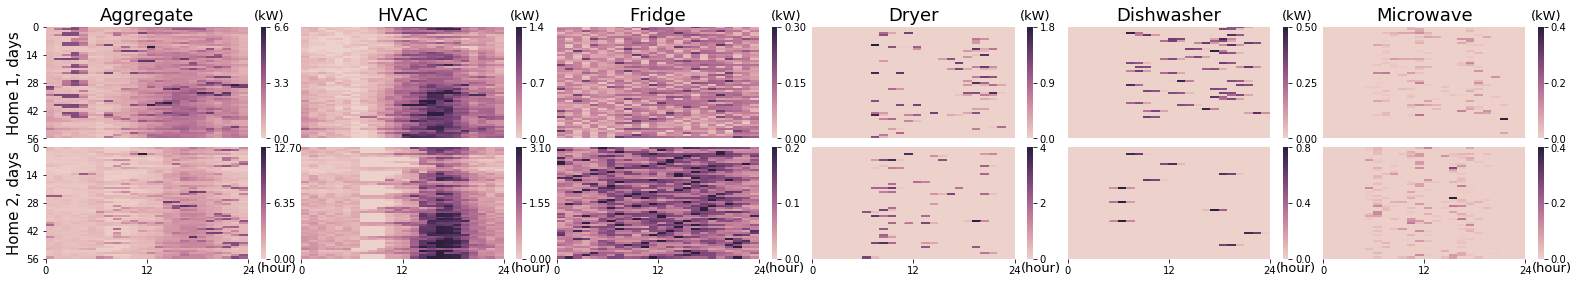

In [9]:
fig, axes = plt.subplots(ncols=6, nrows = 2, figsize=(25, 3.5))
ax = axes.flatten()
home = 51
cmap = sns.cubehelix_palette(as_cmap=True)

for i, home in enumerate([12, 10]):
    for j in range(6):
        vmax = round(tensor[home, j, :56].max()/1000, 1)
        mid = vmax/2
        sns.heatmap(tensor[home, j, :56]/1000, cmap=cmap, ax=ax[i*6+j], 
                    vmin=0, vmax=vmax, cbar_kws={'ticks':[0, mid, vmax]})
        if i == 0:
            ax[i*6+j].collections[0].colorbar.set_label("(kW)", x=1.15, y=1.15, labelpad=-20, fontsize=13, rotation=0)
        

ax[6].collections[0].colorbar.set_label("(hour)", x=1, y=-0.03, labelpad=-25, fontsize=13, rotation=0)
ax[7].collections[0].colorbar.set_label("(hour)", x=1.15, y=-0.03, labelpad=-20, fontsize=13, rotation=0)
ax[8].collections[0].colorbar.set_label("(hour)", x=1.17, y=-0.03, labelpad=-15, fontsize=13, rotation=0)
ax[9].collections[0].colorbar.set_label("(hour)", x=1.5, y=-0.03, labelpad=-5, fontsize=13, rotation=0)
ax[10].collections[0].colorbar.set_label("(hour)", x=1.16, y=-0.03, labelpad=-15, fontsize=13, rotation=0)
ax[11].collections[0].colorbar.set_label("(hour)", x=1.16, y=-0.03, labelpad=-15, fontsize=13, rotation=0)

for i in range(6, 12):
    ax[i].xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
    ax[i].xaxis.set_major_locator(ticker.MultipleLocator(base=12))
for i in [0, 6]:
    ax[i].yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
    ax[i].yaxis.set_major_locator(ticker.MultipleLocator(base=14))
    
for i in range(6):
    ax[i].get_xaxis().set_visible(False)
for i in range(12):
    if i != 0 and i != 6:
        ax[i].get_yaxis().set_visible(False)
    
ax[0].set_ylabel('Home 1, days', fontsize=15)
ax[6].set_ylabel('Home 2, days', fontsize=15)
i=0
ax[i*6].set_title('Aggregate', fontsize=18)
ax[i*6+1].set_title('HVAC', fontsize=18)
ax[i*6+2].set_title('Fridge', fontsize=18)
ax[i*6+3].set_title('Dryer', fontsize=18)
ax[i*6+4].set_title('Dishwasher', fontsize=18)
ax[i*6+5].set_title('Microwave', fontsize=18)
# fig.text(0.5,-0.1, 'Time(24 hours)', ha='center', fontsize=15)
fig.tight_layout()
plt.subplots_adjust(top=0.92, bottom=0.0, left=0.10, right=0.95, hspace=0.08, wspace=0.01)
plt.savefig("./figure/heatmap_home_all.pdf", format='pdf',bbox_inches='tight', pad_inches=0)

/zf14/yj9xs/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


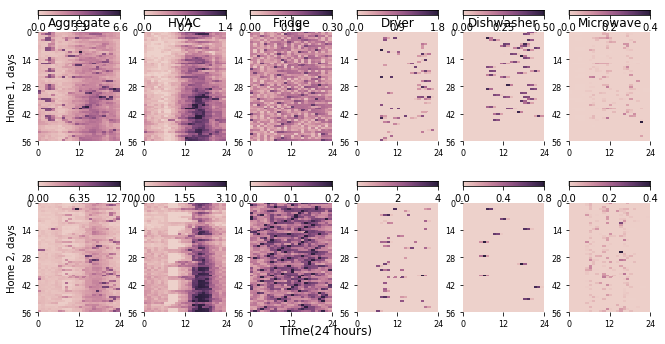

In [4]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.colorbar import colorbar
fig, axes = plt.subplots(ncols=6, nrows = 2, figsize=(10, 5))
ax = axes.flatten()
home = 51
cmap = sns.cubehelix_palette(as_cmap=True)
# sns.set(font_scale=0.8)

for i, home in enumerate([12, 10]):
    
    for j in range(6):
        vmax = round(tensor[home, j, :56].max()/1000, 1)
        mid = vmax/2
        sns.heatmap(tensor[home, j, :56]/1000, cmap=cmap, ax=ax[i*6+j], 
                    vmin=0, vmax=vmax, cbar=False)
        ax_divider = make_axes_locatable(ax[i*6+j])
        cax = ax_divider.append_axes('top', size = '5%', pad = '15%')
        colorbar(ax[i*6+j].get_children()[0], cax = cax, orientation = 'horizontal', ticks=[0, mid, vmax])
        cax.xaxis.set_ticks_position('bottom')
        ax[i*6+j].tick_params(labelsize=8)
        #     sns.heatmap(tensor[home, 1, :56]/1000, cmap=cmap, ax=ax[i*6+1])
#     sns.heatmap(tensor[home, 2, :56]/1000, cmap=cmap, ax=ax[i*6+2])
#     sns.heatmap(tensor[home, 3, :56]/1000, cmap=cmap, ax=ax[i*6+3])
#     sns.heatmap(tensor[home, 4, :56]/1000, cmap=cmap, ax=ax[i*6+4])
#     sns.heatmap(tensor[home, 5, :56]/1000, cmap=cmap, ax=ax[i*6+5], cbar_kws={'label': '(kW)'})
for i in range(12):
    ax[i].xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
    ax[i].xaxis.set_major_locator(ticker.MultipleLocator(base=12))
    ax[i].yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
    ax[i].yaxis.set_major_locator(ticker.MultipleLocator(base=14))
ax[0].set_ylabel('Home 1, days')
ax[6].set_ylabel('Home 2, days')
i=1
# ax[i*6+0].set_xlabel('hour')
# ax[i*6+1].set_xlabel('hour')
# ax[i*6+2].set_xlabel('hour')
# ax[i*6+3].set_xlabel('hour')
# ax[i*6+4].set_xlabel('hour')
# ax[i*6+5].set_xlabel('hour')
i=0
ax[i*6].set_title('Aggregate')
ax[i*6+1].set_title('HVAC')
ax[i*6+2].set_title('Fridge')
ax[i*6+3].set_title('Dryer')
ax[i*6+4].set_title('Dishwasher')
ax[i*6+5].set_title('Microwave')
fig.text(0.5,0.02, 'Time(24 hours)', ha='center', fontsize=12)

fig.tight_layout()
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.3, wspace=0.3)
# plt.savefig("./figure/heatmap_home_all.pdf", format='pdf',bbox_inches='tight', pad_inches=0)

IndexError: index 6 is out of bounds for axis 0 with size 6

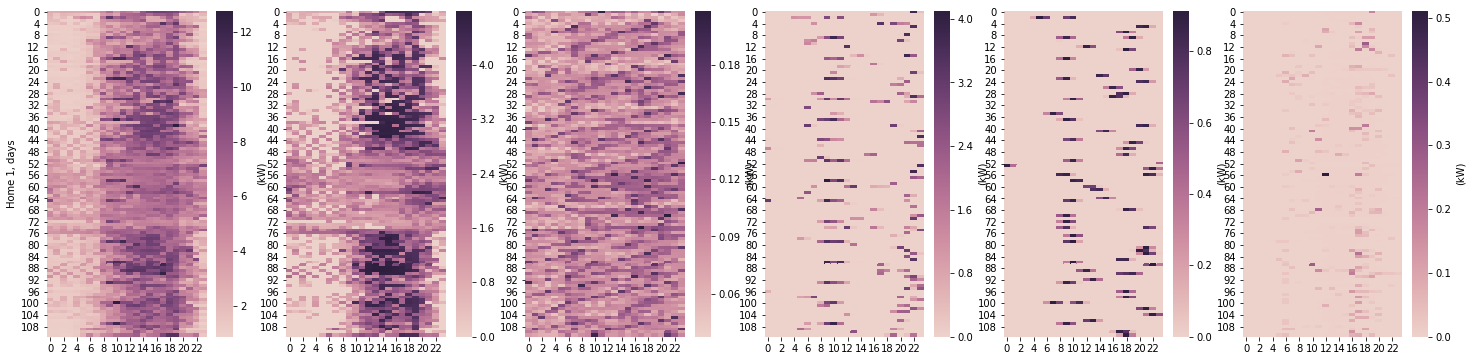

In [67]:
fig, axes = plt.subplots(ncols=6, nrows = 1, figsize=(25, 6))
ax = axes.flatten()
home = 51
cmap = sns.cubehelix_palette(as_cmap=True)

for i, home in enumerate([51]):
    sns.heatmap(tensor[home, 0 ]/1000, cmap=cmap, ax=ax[i*6], cbar_kws={'label': '(kW)'})
    sns.heatmap(tensor[home, 1 ]/1000, cmap=cmap, ax=ax[i*6+1], cbar_kws={'label': '(kW)'})
    sns.heatmap(tensor[home, 2 ]/1000, cmap=cmap, ax=ax[i*6+2], cbar_kws={'label': '(kW)'})
    sns.heatmap(tensor[home, 3 ]/1000, cmap=cmap, ax=ax[i*6+3], cbar_kws={'label': '(kW)'})
    sns.heatmap(tensor[home, 4 ]/1000, cmap=cmap, ax=ax[i*6+4], cbar_kws={'label': '(kW)'})
    sns.heatmap(tensor[home, 5 ]/1000, cmap=cmap, ax=ax[i*6+5], cbar_kws={'label': '(kW)'})
ax[0].set_ylabel('Home 1, days')
# ax[6].set_ylabel('Home 2, days')
fig.tight_layout()
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.1, wspace=0.2)
# plt.savefig("./figure/heatmap_home_all.pdf", format='pdf',bbox_inches='tight', pad_inches=0)

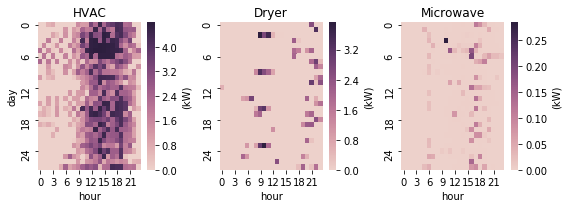

In [29]:
fig, axes = plt.subplots(ncols=3, nrows = 1, figsize=(8, 3))
ax = axes.flatten()
home = 51
cmap = sns.cubehelix_palette(as_cmap=True)

sns.heatmap(tensor[home, 1, :56]/1000, cmap=cmap, ax=ax[0], cbar_kws={'label': '(kW)'}, yticklabels = 6)
sns.heatmap(tensor[home, 3, :56]/1000, cmap=cmap, ax=ax[1], cbar_kws={'label': '(kW)'}, yticklabels = 6)
sns.heatmap(tensor[home, 5, 84:112]/1000, cmap=cmap, ax=ax[2], cbar_kws={'label': '(kW)'}, yticklabels = 6)

ax[0].set_ylabel('day')
ax[0].set_xlabel('hour')
ax[1].set_xlabel('hour')
ax[2].set_xlabel('hour')

ax[0].set_title('HVAC')
ax[1].set_title('Dryer')
ax[2].set_title('Microwave')
fig.tight_layout()
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.55,
                    wspace=0.35)
plt.savefig("./figure/heatmap_home_sub.pdf", format='pdf')

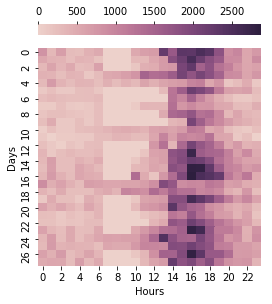

In [50]:
from numpy import *
import os
import matplotlib.pyplot as plt
# fig, axes = plt.subplots(ncols=1, nrows = 2, figsize=(8, 3))


# data = loadtxt(os.getcwd()+txtfl[0], skiprows=1)
# fig1 = plt.figure()
plt.figure(figsize=(4, 5))


ax=sns.heatmap(tensor[10, 1, :28], cmap=cmap, cbar_kws = dict(use_gridspec=False,location="top"))
fig.tight_layout()
ax.set_ylabel("Days")
ax.set_xlabel("Hours")
# plt.savefig("./figure/heatmap_CNN.pdf", format='pdf')

plt.savefig("./figure/CNN_example_hvac.pdf", format='pdf')